### Insert description here

In [5]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [7]:
import sys
sys.path.append('../../bin')
sys.path.append('../../lib')
from model import MODEL
import utils, plotting, fstats, fstats_pct_chg
import pandas as pd

In [8]:
#your intra-day time at which to evaluate the model.
day_hour = 18
#your tickers of interest
tickers = ['BTC-USD']

In [9]:
#do not edit below this cell!

In [10]:
#specify dates:
todays_date = pd.Timestamp.today()
start_date = todays_date - pd.Timedelta('200 days')
filter_date = start_date.floor(freq='D').replace(hour=day_hour)
#get data:
model = MODEL(tickers=tickers)
model.get_data(start=start_date, interval='60m')
#filter by datetime:
date_range = utils.create_date_range(start_date=filter_date)
model.apply_date_filter(date_range, force_apply=True)

[*********************100%***********************]  1 of 1 completed
[INFO]: filter applied.


In [11]:
model.eval_model()

|                                 PRICE MODEL                                  |
|                                 Version 0.3                                  |
|                  Authors: Marco Rosenzweig & Patrick Lorenz                  |
--------------------------------------------------------------------------------
|                             ticker = ['BTC-USD']                             |
|                            start date = 02/26/20                             |
|                             end date = 09/12/20                              |
|                     initial investment per ticker = 200                      |
[INIT]: Initialising model for tickers: ['BTC-USD']
[INIT]: Successfully initialized model.
********************************************************************************
[TICKER]: BTC-USD
[INFO]: Open position.
[INFO]: No tax paid.
[INFO]: Last entry of "Sell Dates" will be assigned equally as the penultimate one.
---------------------------------

In [12]:
plot_date = todays_date - pd.Timedelta('30 days')
plot_start = str(plot_date.date())

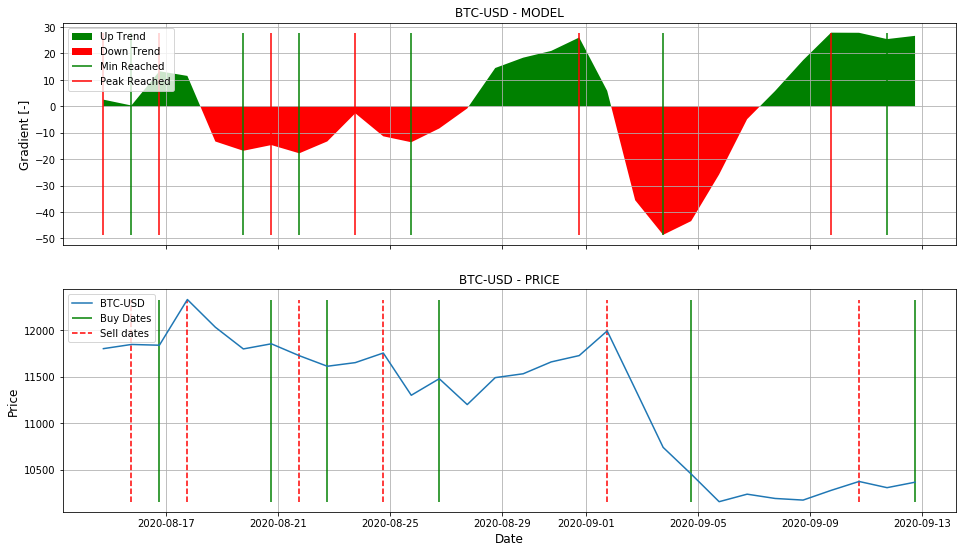

In [13]:
plotting.plot_model(model, tickers='BTC-USD', plot_from_date=plot_start)

In [14]:
imag_model = model.copy_model()
imag_model.append_timedelta(timedelta=1)
imag_model.comp_break_values(tickers='all', parallel_computing=True)
imag_model._init_model()

[INFO]: New data was appended.
[INFO]: Compute break values with 30.00% deviation
[INFO]: Current ticker: BTC-USD
[INFO]: Using 10 processes.
[INFO]: Current values: {'BTC-USD': 10365.056640625}
[INFO]: Break values: {'BTC-USD': array([10381.64073125, 10418.95493516])}
[INFO]: Tolerances: {'BTC-USD': array([16.58409063, 53.89829453])}
[INIT]: Initialising model for tickers: ['BTC-USD']
[INIT]: Successfully initialized model.
********************************************************************************


[INFO]: Current ticker: BTC-USD
--------------------------------------------------------------------------------
[INFO]: Result for value: 10251.870222109637


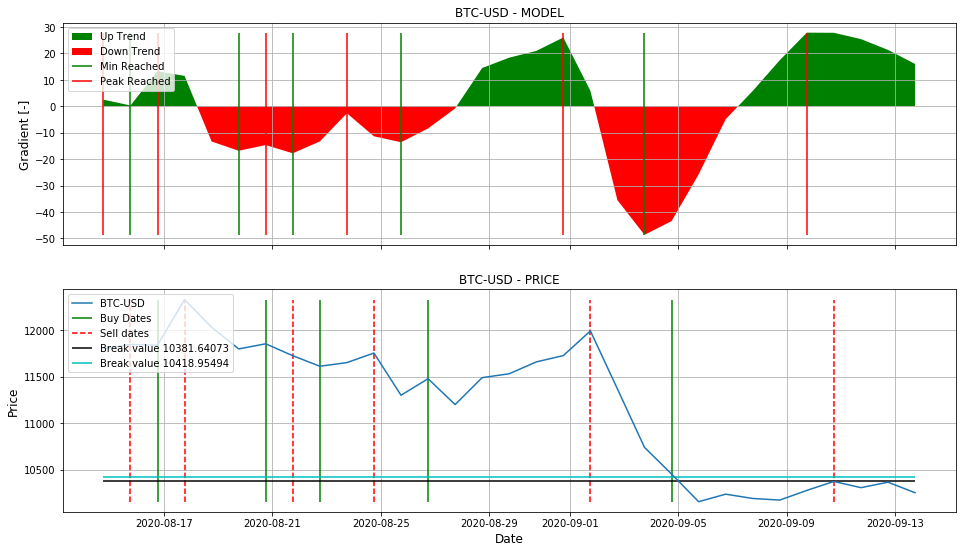

--------------------------------------------------------------------------------
[INFO]: Result for value: 10400.297833203393


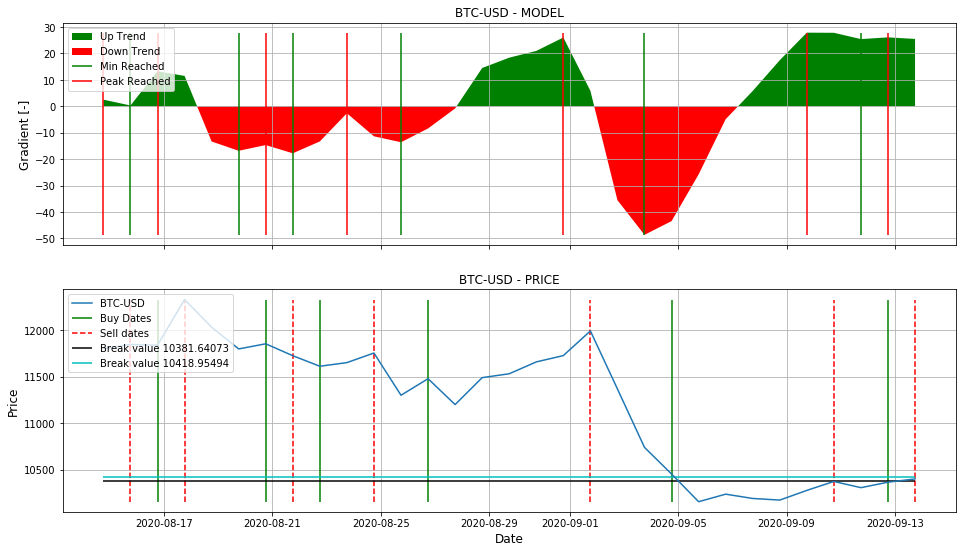

--------------------------------------------------------------------------------
[INFO]: Result for value: 10549.191871845975


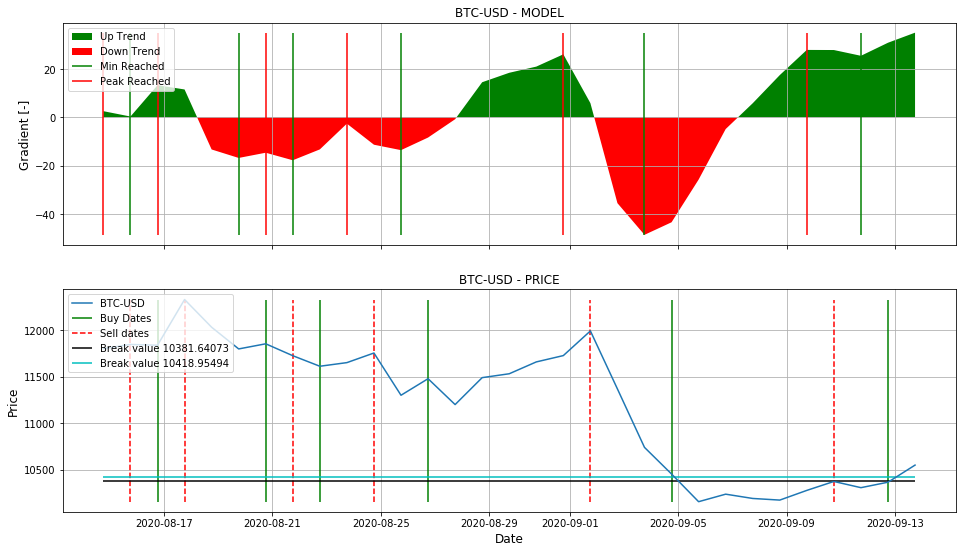

In [15]:
imag_model.show_possibilities(plot_from_date=plot_start, switch_axes=False)

[INFO]: Current ticker: BTC-USD
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Auto update of tolerances!
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Current value: 10360.3056640625!
[STATS-INFO]: New tolerances: [21.33506719 58.64927109]!
[STATS-EVAL]: Probability for tol=0.00206: 49.68%
[STATS-EVAL]: Probability for tol=0.00566: 46.39%
[STATS-EVAL]: Probability between: 3.29%


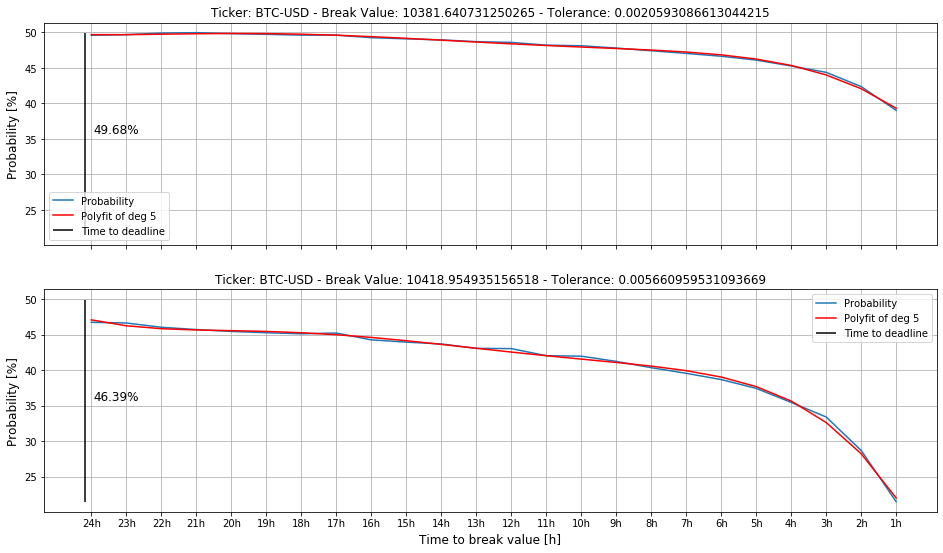

In [16]:
fstats_pct_chg.calc_probs(model=imag_model, tickers='all', auto_update_tolerances=True)